## Pre-trained Demo Model

### Environment Setup

In [5]:
# Usual suspects
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling tools
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

### Load Pre-Trained Model

In [3]:
invasive_model = load_model('KerasModel2.h5')

In [4]:
invasive_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       36992     
_________________________________________________________________
activation_8 (Activation)    (None, 13, 13, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)        

### Organize Test Data

In [6]:
#Instantiaate the ImageDataGenerator for the test data.
# The only thing I want to do to the test data is rescaling each pixel value to be a float between 0 and 1 
# instead of an integer between 0 and 255.

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# Batch size of 32 seems popular with smallish data sets.
batch_size = 32

In [8]:
categories = ['giant hogweed', 'blueweed', 'gorse']

In [9]:
test_generator = test_datagen.flow_from_directory(
                                                  'data/final_BC_images/test/',
                                                  target_size=(32, 32),
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 1632 images belonging to 3 classes.


In [12]:
test_stepsize = test_gePnerator.samples//test_generator.batch_size
print(f'The test set stepsize is: {test_stepsize}')

The test set stepsize is: 51


### Create test set predictions

In [14]:
# Getting bestmodel's predictions (as probabilities) on the test set 
test_probas = invasive_model.predict_generator(test_generator, steps=test_stepsize)

# Setting the model's class prediction as the class that received the highest probability for each image
test_predictions = test_probas.argmax(axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [15]:
# Getting the true class labels for the test set
test_true = test_generator.classes

# Sanity check 
test_true

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [16]:
test_predictions

array([0, 0, 0, ..., 2, 2, 0])

In [17]:
# Displaying the classification report for the test set
print('Classification Report\n \n', classification_report(test_true, test_predictions, target_names=categories))

Classification Report
 
                precision    recall  f1-score   support

giant hogweed       0.77      0.96      0.85       506
     blueweed       0.96      0.89      0.92       523
        gorse       0.98      0.84      0.91       603

     accuracy                           0.89      1632
    macro avg       0.91      0.90      0.89      1632
 weighted avg       0.91      0.89      0.90      1632



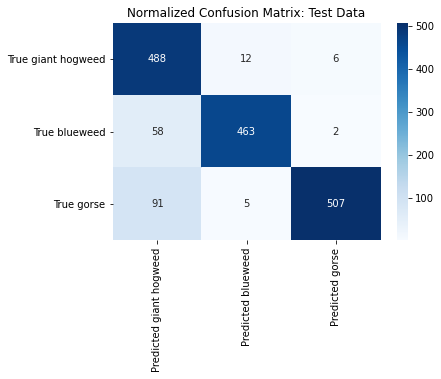

In [18]:
# Get a confusion matrix 
test_matrix = pd.DataFrame(confusion_matrix(test_true, test_predictions), 
                           columns=['Predicted ' + cat_name for cat_name in categories], 
                           index=['True ' + cat_name for cat_name in categories])

# Plotting as a heatmap 
plt.figure()
sns.heatmap(test_matrix, cmap='Blues', annot=True, fmt='g')
plt.title('Normalized Confusion Matrix: Test Data')
plt.show()